# MA943 - Numerical Methods

## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [47]:
include("question1.jl") 
setprecision(BigFloat, 128)
a_float32 = recursive_fp(Float32);
a_float64 = recursive_fp(Float64);
a_bigfloat = recursive_fp(BigFloat);


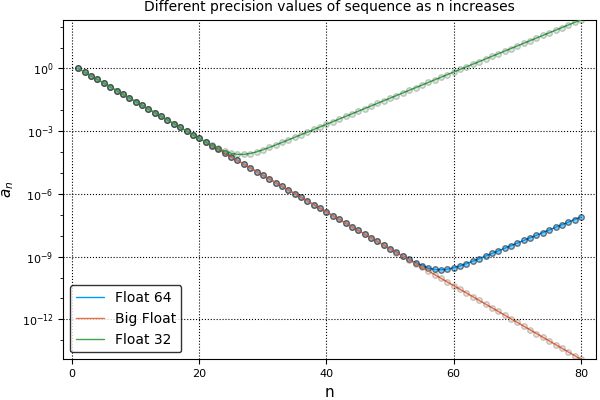

In [138]:
using Plots
using LaTeXStrings
pyplot()
N =1:80
# print(typeof(a_bigfloat))
plot(N, a_float64,yaxis = :log, xaxis = :none, label = "Float 64", legendfont = font(10), xlabel = "n", 
     m =(0.5), title = "Different precision values of sequence as n increases", titlefont = font(10))
plot!(N, a_bigfloat, yaxis = :log, xaxis = :none,ylabel = L"a_n", m =(0.2), label = "Big Float", legendfont = font(10))
plot!(N, a_float32,yaxis = :log, xaxis = :none, label = "Float 32", legendfont = font(10) ,m =(0.2) )


Consider the recursion $a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$ then an anzat solution is $a_n = \lambda^n$. Then we can see that $\lambda \neq 0$ otherwise the initial condition $a_1 = 1$ would not hold. 

Then $\lambda ^{n+1} = 2 \lambda^n - \frac{8}{9} \lambda^{n-1}$ so $\lambda^2 = 2 \lambda- \frac{8}{9}$ which we can solve the quadratic equation to find that $\lambda = \frac{2}{3}$ or $\lambda = \frac{4}{3}$. 

Then the general solution $$\left( a_n \right) _{n \in \mathbb{N}_{<0}} = A \left( \frac{2}{3} \right)^n + B \left( \frac{4}{3} \right)^n$$ where $A, B \in \mathbb{R}$ can be found by evaluating the general solution at the inital conditions $a_1 = 1 \ \text{and} \ a_2 = \frac{2}{3}$. So $A= \frac{3}{2} $ and $A = 0$ then $$\left( a_n \right) _{n \in \mathbb{N}_{<0}} = \frac{3}{2} \left( \frac{2}{3} \right)^n $$

Which goes to zero as $n \rightarrow \infty$, this cannot be seen in the numerical results above as we have a turning point where the sequence starts increasing. Instead we let $a_1 = 1$ and $a_2 = \frac{2}{3} + \epsilon$ where $\epsilon$ is loss of significance. Then the solution is now,
 $$\left( a_n \right) _{n \in \mathbb{N}_{<0}} = \frac{6-9 \epsilon}{4} \left( \frac{2}{3} \right)^n + \frac{9 \epsilon}{8} \left( \frac{4}{3} \right)^n$$
This takes into account the dynamical instabilities as every operation commits an error of at least $\epsilon$ then the recursion accumulates errors. Then as $B$ is small, as $n \rightarrow \infty$, $a_n$ will exponentially grow towards the other solution (since $\frac{4}{3}>1$, then $B$ will eventually dominate).

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [133]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [134]:
#part 1, verify that mergepresorted(a::Arrary{Int64,1}, b::Array{Int64,1}) works
m = rand(1:100) #random length m
n = rand(1:100) #random length n
a = sort(rand(1:100, m)) #sorted vector length m
b = sort(rand(1:100, n)) #sorted vector length n

mergepresorted(a,b); #vector of length n+m

In [135]:
function sortarray(A::Array{Int64,1})
    if length(A) == 1
        return A
    else
        Into_two = Int(0.5*length(A))
        a = sortarray(A[1:Into_two])
        b = sortarray(A[(Into_two+1):end])
        return mergepresorted(a,b)
    end
end

sortarray (generic function with 1 method)

If $F(n)$ is the computational complexity then we can see from the code that:
1. $F(1) = 1$ since when the length(A)==1, we return the sorted array immediately
2. $F(n) = 2 F( \frac{n}{2}) + \frac{n}{2} + \frac{n}{2} =   2 F( \frac{n}{2}) + n$

This because do a recurrsive relation twice when we do sortarray on a and b and we add $n$ because the the computational complexity of mergepresorted in $n$.

In [136]:
#verify that sortarray works
k = 64 
y = rand(1:100, k)

sortarray(y);

$F(n) = 2 F(\frac{n}{2}) +1$ then let $n = 2^p, \ b_p = F(2^p)$ then $b_0 = F(2^0) = 1$ and $$b_p = 2 b_{p-1} +2^p$$

Then the solution to the homogenous equation $b_p = 2 b_{p-1}$ with the ansatz $b_p = A \lambda ^p$ where $A \in \mathbb{R}$, then $\lambda = 2$ and $b_p = A \left( 2 \right) ^n$.

Then for the inhomogenous equation $b_p = 2b_{p-1}+ 2^p$ consider the ansatz $b_p = Bp 2^p + C$ where $B, C \in \mathbb{R}$

Then we find $B=1 \ \text{and} \ C=0$ so the general solution is $b_p = p 2^p + A 2^p$ with $b_0 = A = 1$ then $$b_p = 2^p (p+1)$$ Then changing back to the orginal variables we get $$F(n) =p(n+1) = n \left( \frac{\log(n)}{\log(2)} +1 \right) \sim \mathcal{O}(n \log(n))  $$  

In [137]:
lengths = zeros(15)
for j =1:15
    lengths[j] = 2^j
end

times = zeros(15)
theortime = zeros(15)
for k = 1:15
    elem = rand(1:Int(lengths[k]), Int(lengths[k]))
#     elem = rand(1:Int(2^15), Int(lengths[k]))
    times[k] = (@timed sortarray(elem))[2]
    theortime[k] = (lengths[k]*log(lengths[k])) + lengths[k]
end
theortime = times[1]*theortime
println(times)

[1.493e-6,2.002e-6,3.915e-6,9.312e-6,2.3802e-5,6.1855e-5,0.000155032,0.000459539,0.00134203,0.00962172,0.0182785,0.050961,0.343892,1.80129,8.18936]



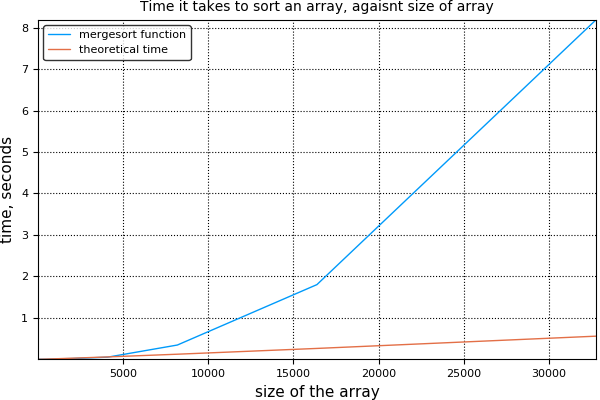

In [139]:
plot(lengths, times, label = "mergesort function", xlabel = "size of the array", ylabel = "time, seconds" )
plot!(lengths, theortime, label = "theoretical time", title = "Time it takes to sort an array, agaisnt size of array", titlefont = font(10))